# Result

- <b> Models <br>
 1. Linear Regression<br>
 2. Linear Regression with SGD<br>
 3. Polynomial Regression<br>
 4. Polynomial Regression with regularization<br>
 5. Ridge<br>
 6. Lasso<br>
 7. Elastic Net<br>
 8. KNN Regression<br>
 9. Decision Tree<br>
 10. SVM Regression Linear<br>
 11. SVM Regression with kernels( Poly, rbf , sigmoid) - Could not be run as it took a very long time<br>


-<b> Best Model parameters<br>
      The best model choosen based on CV score is : Linear Regression



-<b> Mean Cross validation score of Best model<br>
      The Mean Cross validation score of Linear Regression: 0.20
  
  

-<b> Test score of best model<br>
      The test score of best model Linear Regression : 0.203
  
  

-<b> Train score of best model<br>
      The train score of best model Linear Regression : 0.208

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# for the Q-Q plots
import scipy.stats as stats
%matplotlib inline

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Loading Dataset

In [2]:
data = pd.read_csv('Patent Data Variables.csv')  
data.head()

,pat,fwd,lag_d,lag_y,noc,gy,ay,noi,UMC,firm,...,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
0,6052760,35,895,3,6,2000,1997,3,711,596125,...,3,2,0.000023,3.33333,2.66666,9.74898,0.00000,0.0,0.05382,32.0
1,6052764,6,851,3,22,2000,1997,1,711,755619,...,0,2,0.000000,9.00000,0.00000,0.00000,0.00000,0.0,0.02247,18.0
2,6052773,66,1778,5,22,2000,1995,3,712,357270,...,0,2,0.000000,3.66666,0.00000,0.00000,0.00000,0.0,0.00000,NaN
3,6052775,14,1028,3,13,2000,1997,2,712,551495,...,0,2,0.000000,5.00000,3.50000,0.73076,0.00000,0.0,0.09262,17.0
4,6052776,7,915,3,9,2000,1997,3,712,252865,...,3,3,0.000000,5.33333,1.33333,2088.45722,0.33333,0.0,0.05907,330.0


## Variable Description :


	1. pat : Patent Number
	2. fwd: Number of forward citation received by patent (How many new patents refer to this patent)
	3. lag_d: Difference between grant date and application date in days 
	4. noc: Number of claims in the patent. 
	5. gy: year in which patent was granted
	6. ay: year in which patent was applied 
	7. noi: number of inventors
	8. umc: 3-digit technology primary classes of patents.
	9. firm id : firm to whom the patent is assigned
	10. MSA: Regional ID : MSA (Metropolitan statistical area) ID for the region of first inventor of patent. Country ID for Non US countries.
	11. tbm: total backward citations made by the patent (Total number of patents cited by this patent)
	12. tbru: technical breadth of patent. A higher value indicate that patent is broad(interms of tech)
	13. pag: Prior art age. A higher value for this variable indicates  patent on relatively newer technology.
	14. npr: Non Patent References: the number of non-patent references cited by the focal patent
	15. fpr: Foreign Patent References : number of foreign patent references cited by focal patent.
	16. ft:  Firm_Type: Based On NBER Data types - 7 types of Assigneee: 1 - unassigned; 2 - US non government organization; 3- non US non government organization; 4- US individuals; 5-non US individuals; 6- US government; 7- non US government
	17. cent: Centrality: Teams that occupy more central positions in a network can potentially control both the information flow and the resources of the network. 
	18. dt : Direct ties : distance 1
Ex:  Of two inventors, A and B. Assume that inventor A has ties with C and D at distance 1 and with E and F at distance 2, while inventor B has ties with C and F at distance 1 and with G at distance 2. For this team, the number of unique direct contacts (C, D and F) is 3.
	19. it : Number of indirect ties : other than distance 1
	20. rt: We count the number of unique patents on which a pair of inventors of the focal team have worked in the last three years as a measure of repeat ties. 
	21. 3rd_Pt: We count the number of unique common inventors with whom a pair of inventors of the focal team (who are collaborating for the first time) have previously worked in the last three years as a measure of third party ties
	22. rnd_int: R&D intensity : RD investment /sales - based on data for one year before patent application.
	23. fs: Firm Size : Total no of employess from Compustat - based on data for one year before patent application.


<b> <font color='purple'> From the varaiable description we know that columns pat and firm are ID nos. 

# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
lag_y      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(15)
memory usage: 12.5 MB


In [4]:
#Checking for null values in dataset
data.isnull().sum()

pat            0
fwd            0
lag_d          0
lag_y          0
noc            0
gy             0
ay             0
noi            0
UMC            0
firm           0
MSA            0
tbm            0
tbru           0
PAG            0
npr            0
fpr            0
FT             0
Cent           0
EXP_Y          0
DT             0
IT             0
RT             0
3rd_PT         0
Rnd_Int        0
FS         26727
dtype: int64

 <b> <font color='purple'> There are no Nan or Null values in the dataset except for the column FS - Firm Size <b> </font>

In [5]:
# Getting Column names
[data.columns]

[Index(['pat', 'fwd', 'lag_d', 'lag_y', 'noc', 'gy', 'ay', 'noi', 'UMC', 'firm',
        'MSA', 'tbm', 'tbru', 'PAG', 'npr', 'fpr', 'FT', 'Cent', 'EXP_Y', 'DT',
        'IT', 'RT', '3rd_PT', 'Rnd_Int', 'FS'],
       dtype='object')]

In [6]:
# Getting rows, cols in dataset
data.shape

(65535, 25)

<b> <font color='purple'> The dataset contains 65535 rows and 25 columns. There are 24 predictor variables and 1 target variable <b> </font>

In [7]:
# Drop columns
#data = data.drop(['pat', 'gy', 'ay', 'lag_y'], axis=1)
data = data.drop(['pat'], axis=1)

In [8]:
# Segregating predictors into groups for analysis

Cat_var = ['FT', 'firm', 'MSA', 'gy', 'ay', 'UMC']

continuous = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in ['FT', 'firm', 'MSA', 'gy', 'ay', 'UMC']
]

categorical = [var for var in data.columns if var not in continuous ]

print(f'There are {len(continuous)} continuous variables')

print(f'There are {len(categorical)} categorical variables')

There are 18 continuous variables
There are 6 categorical variables


In [9]:
# Listing Categorical variables
for var in categorical:
    print(var, data[var].unique()[0:20], '\n')

gy [2000 2004 1999 1998 1997 1996 1995 1994 1993 1992 1991 1990 1989 1988
 1987 1986 1985 1984 1983 1982] 

ay [1997 1995 1996 1994 1993 1991 1992 1990 1988 1986 1989 1987 1983 1985
 1982 1984 1981 1980 1979] 

UMC [711 712 713 726 714 705 706 707 708 718 709 725 381 382 386 715 716 703
 717 340] 

firm [596125 755619 357270 551495 252865 280070 767124 767125 373440 278220
 211480 361691 641805 499570 728129 767117 512710 746763 706518 279275] 

MSA [156 261  32 553  16  31 240  52 168  13 202 538 243 268 537 198 251 213
 552 257] 

FT [2 3 1 4 6 5 7] 



In [10]:
# Listing Continuous variables
for var in continuous:
    print(var, data[var].unique()[0:20], '\n')

fwd [35  6 66 14  7  5 39  3  9 83 12 10 18 41 23  4  2 17 20 52] 

lag_d [ 895  851 1778 1028  915 1191 1020 1152 1036  917  879  840 1267 1023
 1805  839  935 1103  963  991] 

lag_y [ 3  5  4  6  7  9  8 12 10  2 11  1  0 14 13] 

noc [ 6 22 13  9 14 35 24 19 25 12 26 17 47 10 64 46 34 36  7 18] 

noi [ 3  1  2  5  4  7  9  8  6 10 13 11 14 26 12 17 20 16 18 23] 

tbm [54  5 28  4  7 15 19 64 18 14 16  9  0 30 12  6 26 10  8 13] 

tbru [0.65505 0.32    0.63778 0.375   0.24491 0.34668 0.70915 0.72075 0.44447
 0.53063 0.46095 0.71607 0.      0.449   0.66668 0.72003 0.83337 0.75
 0.61112 0.87879] 

PAG [5019564.222 5578147.    5072923.    5787045.    5696488.857 5556357.333
 5414483.316 5176279.641 5589587.667 5598866.929 5692770.188 5752330.333
       0.    5091314.857 5438811.467 4996111.    5672518.833 5348964.5
 5352904.5   5297216.577] 

npr [  6   0  25   1   5  12  22   7   9  14 176   3   4   2   8  53  31  10
  11  13] 

fpr [ 3  0 15 20  2  6  9  1  4  5 44 19 12 13 23  8  7 

<b> <font color='purple'> By looking at the distinct values in categorical and continuous variables, we see that:<br>
    1. The column ay, gy are years
    2. Columns like tbm, tbru, PAG, npr, fpr, EXP_Y, DT, IT, RT, 3rd_PT, Rnd_Int though did not contain Nan values, there       are 0 and should be further investigated
    3. As already observed column FS contains Nan Values
    

In [11]:
# Summary table of dataset
data.describe()

,fwd,lag_d,lag_y,noc,gy,ay,noi,UMC,firm,MSA,...,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
count,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,6.553500e+04,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,38808.000000
mean,26.730800,923.934127,2.546807,18.856489,1995.320287,1992.773480,2.444038,567.743236,4.364026e+05,275.958251,...,1.084245,2.225330,0.000498,1.638537,0.916463,80.069878,0.255761,0.006082,0.086413,129.095522
std,33.322636,364.032954,1.071413,15.708926,4.481961,4.416591,1.792134,180.319111,3.336912e+06,188.192800,...,3.031729,0.661858,0.006973,2.625059,2.324044,420.356247,1.311577,0.078734,6.469271,123.784974
min,0.000000,0.000000,0.000000,1.000000,1980.000000,1979.000000,1.000000,2.000000,0.000000e+00,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,691.500000,2.000000,9.000000,1993.000000,1991.000000,1.000000,375.000000,2.500600e+05,142.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,16.000000,888.000000,2.000000,16.000000,1997.000000,1994.000000,2.000000,704.000000,3.867350e+05,260.000000,...,0.000000,2.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.050170,94.000000
75%,33.000000,1100.000000,3.000000,24.000000,1999.000000,1996.000000,3.000000,711.000000,6.726890e+05,526.000000,...,1.000000,3.000000,0.000000,2.500000,0.666660,0.000000,0.000000,0.000000,0.073030,225.000000
max,841.000000,5285.000000,14.000000,375.000000,2004.000000,1997.000000,32.000000,800.000000,8.520611e+08,610.000000,...,91.000000,7.000000,0.338530,24.000000,46.000000,3161.845890,87.444440,8.250000,1639.000000,854.000000


<b> <font color='purple'> The above summary indicates that the feature need to be scaled<br>

## Target Variable Analysis

The Skewness of the fwd (target variable) is =  4.0605424345327705


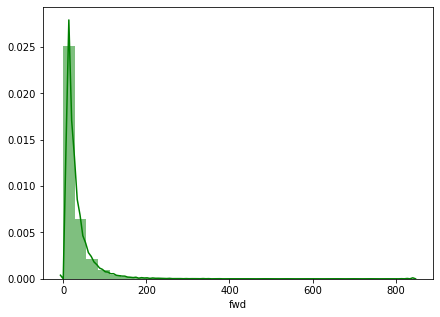

In [12]:
plt.figure(figsize=(7, 5))
sns.distplot(data['fwd'], color='g', bins=30, hist_kws={'alpha': 0.5});
print('The Skewness of the fwd (target variable) is = ', data['fwd'].skew())

((array([-4.25235536, -4.04941272, -3.93887608, ...,  3.93887608,
          4.04941272,  4.25235536]),
  array([  0,   0,   0, ..., 551, 559, 841], dtype=int64)),
 (26.869525591687804, 26.730800335698476, 0.8062985549511898))

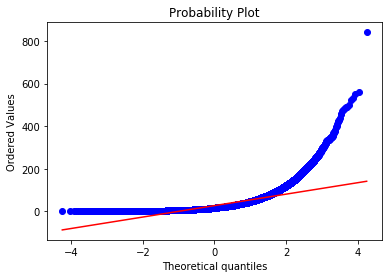

In [13]:
stats.probplot(data['fwd'], dist="norm", plot=plt)

<b> <font color='purple'> The above QQ plot indicates that the target variable does not have normal distribution<br>

The Skewness of the fwd (target variable) is =  1.6214736780543586


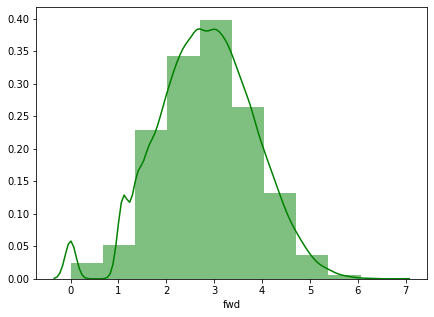

In [14]:
plt.figure(figsize=(7, 5))
sns.distplot(np.log1p(data['fwd']), color='g', bins=10, hist_kws={'alpha': 0.5});
print('The Skewness of the fwd (target variable) is = ', np.log1p(data['fwd'].skew()))

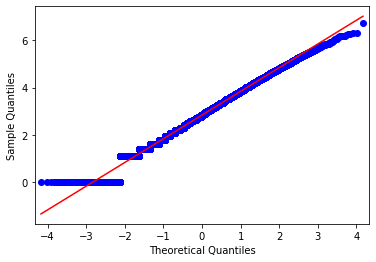

In [15]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log1p(data['fwd']), line='s')
plt.show()

<b> <font color='purple'> The log transformation to some extent has reduced the skewness of target variable. But there are large count of 0 in the target variable. Hence this needs further investigation

In [16]:
data['fwd'] = np.log1p(data['fwd'])

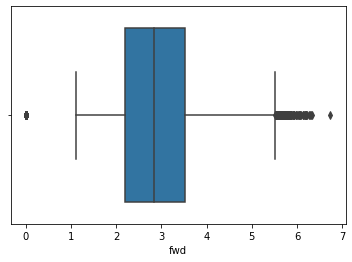

In [17]:
# Boxplot
boxplot_Func = sns.boxplot(x ='fwd', data = data)

In [18]:
data.groupby('fwd').fwd.count()

fwd
0.000000    1089
1.098612    2297
1.386294    2530
1.609438    2644
1.791759    2489
            ... 
6.259581       1
6.282267       1
6.313548       1
6.327937       1
6.735780       1
Name: fwd, Length: 351, dtype: int64

<b> <font color='purple'> The target variable has 1089 observations which do not have any forward citations

In [19]:
Zero_in_Target = 1089 / len(data)
Percent_zero  = Zero_in_Target*100
Percent_zero

1.6617074845502404

<b> <font color='purple'> We can see that our target variable has 1.6% of its values as 0. However we cannot drop all of them as that may cause us to loose some information. 

In [20]:
# correlation Matrix
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,fwd,lag_d,lag_y,noc,gy,ay,noi,UMC,firm,MSA,tbm,tbru,PAG,npr,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
fwd,1,-0.0655132,-0.0610361,0.152065,-0.17706,-0.164874,0.0942375,0.0727181,0.00240981,-0.197031,0.10365,0.0872443,-0.038847,0.0914004,0.0114124,-0.171012,-0.0152372,-0.0416511,-0.0281033,-0.0533117,-0.0121913,-0.00215644,-0.00387221,0.0152904
lag_d,-0.0655132,1,0.926453,0.0740413,0.166987,-0.0552882,0.0447792,0.0876244,0.00167618,0.00406179,0.0816326,0.0791393,0.0466256,0.0603447,0.0584271,0.0117053,-0.0214507,-0.0491674,-0.0326447,-0.0384714,-0.048942,-0.00210887,0.00197015,0.0134044
lag_y,-0.0610361,0.926453,1,0.0682817,0.180093,-0.0598299,0.0405611,0.0864354,-0.000917645,9.1576e-05,0.0741697,0.0752487,0.0537633,0.0514687,0.0488377,0.00938852,-0.0222725,-0.0569795,-0.0339683,-0.0423433,-0.0517956,9.46256e-05,0.00157495,0.0197831
noc,0.152065,0.0740413,0.0682817,1,0.160142,0.145947,0.0617851,-0.00737004,0.0054105,-0.0983579,0.145126,0.0581036,0.0907609,0.129471,0.0921666,-0.0789034,0.0118477,0.029057,0.0385041,0.0335033,0.0193209,0.00604323,-0.000730608,-0.128946
gy,-0.17706,0.166987,0.180093,0.160142,1,0.971113,0.0406329,0.056991,0.00579717,0.0227589,0.120178,0.0453794,0.548816,0.100158,0.101282,-0.01292,0.0577799,0.15124,0.142125,0.162125,0.0518989,0.0281765,0.00529317,-0.155691
ay,-0.164874,-0.0552882,-0.0598299,0.145947,0.971113,1,0.0313947,0.0368663,0.00610558,0.0230735,0.103964,0.0277966,0.543897,0.0891552,0.0909335,-0.0153888,0.0640382,0.167301,0.152469,0.174797,0.0652321,0.0285706,0.00498945,-0.162762
noi,0.0942375,0.0447792,0.0405611,0.0617851,0.0406329,0.0313947,1,0.0568738,0.00427121,0.00376329,0.0760904,0.0439964,0.0216381,0.0524949,0.0746312,0.050158,0.0223768,0.0249478,0.0832243,0.0586523,0.280998,0.0967789,-0.00336907,0.104745
UMC,0.0727181,0.0876244,0.0864354,-0.00737004,0.056991,0.0368663,0.0568738,1,0.000273895,-0.10341,0.0103437,0.116047,0.0789572,0.0523401,-0.0815074,-0.0604717,0.0375371,0.0519387,0.0800303,0.0648792,0.0427973,0.025127,-0.00294588,0.0264412
firm,0.00240981,0.00167618,-0.000917645,0.0054105,0.00579717,0.00610558,0.00427121,0.000273895,1,0.0126489,-0.000227993,0.00182178,0.00201605,0.00148617,0.0021515,0.026137,-0.00102938,-0.00430096,-0.00434401,-0.00293975,-0.00132056,-0.00151103,0.000428897,-0.111879
MSA,-0.197031,0.00406179,9.1576e-05,-0.0983579,0.0227589,0.0230735,0.00376329,-0.10341,0.0126489,1,-0.107273,-0.0931683,0.0078752,-0.0722677,0.129966,0.519192,-0.0167101,-0.0449917,-0.0256687,-0.0167029,-0.0161854,-0.00820987,-0.00583486,0.122321


<b> <font color='purple'> Since the difference of values in gy and ay are captured in columns lag_d and lag_y, there is a high correlation between these variables. This indicates that use of ridge algorithm may result in better prediction as it works well with multi collinear variables

<b> <font color='purple'> From the heatmap:
  1. The high positively correlated features are <br>
     a. MSA(Metropolitan statistical area ID) and FT (firm type)<br>
     b. ay, gy with PAG
     c. tbm (total backward citations) and fpr(Foreign Patent References) - Maybe the majority of the citations made by this patent are foreign patents<br>
     d. tbm (total backward citations) and npr (Non Patent References)<br>
     e. tbm (total backward citations) and tbru (technical breadth of patent) - More broader the technical breadth of patent more citations might have been used<br>
 <b> <font color='purple'>    
  2. The high negatively correlated features are <br>
     a. fwd(forward citation) and MSA(Metropolitan statistical area ID)<br>
     b. fwd(forward citation) and FT (firm type)<br>
     c. ay, gy with fwd
     

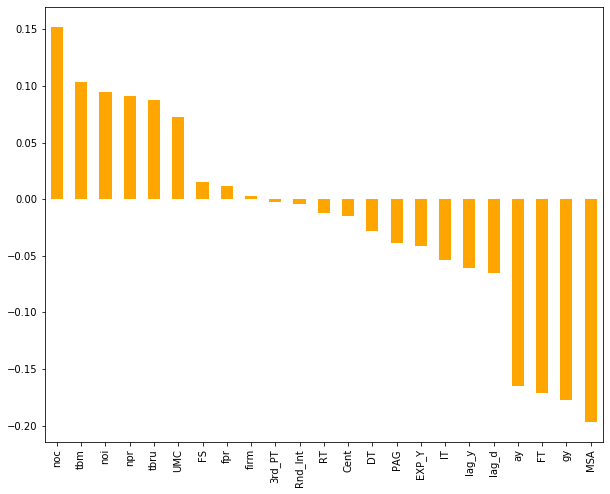

In [21]:
data.corr()['fwd'].sort_values(ascending=False).iloc[1:].plot(kind='bar', figsize=(10, 8), color='orange')


## Categorical Variable Analysis

In [22]:
categorical

['gy', 'ay', 'UMC', 'firm', 'MSA', 'FT']

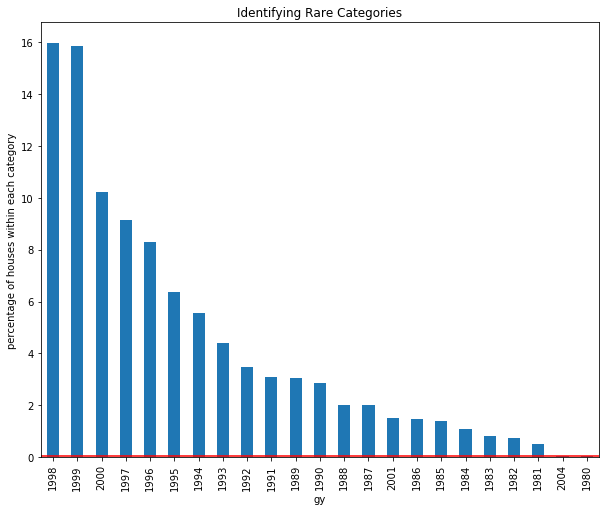

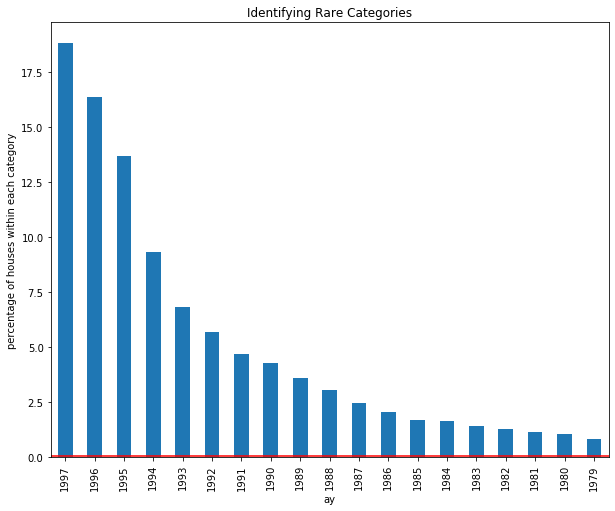

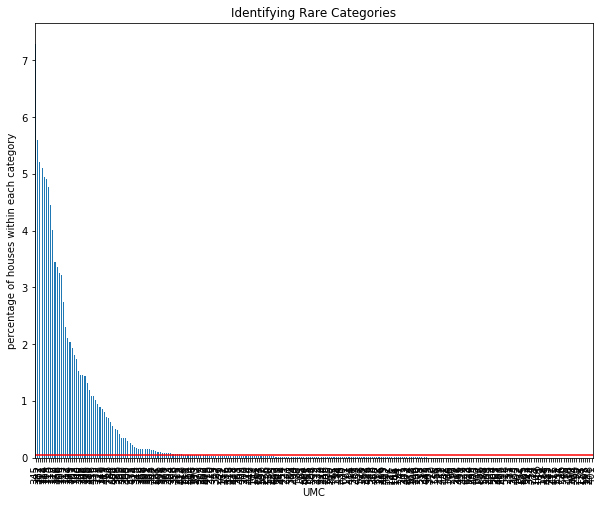

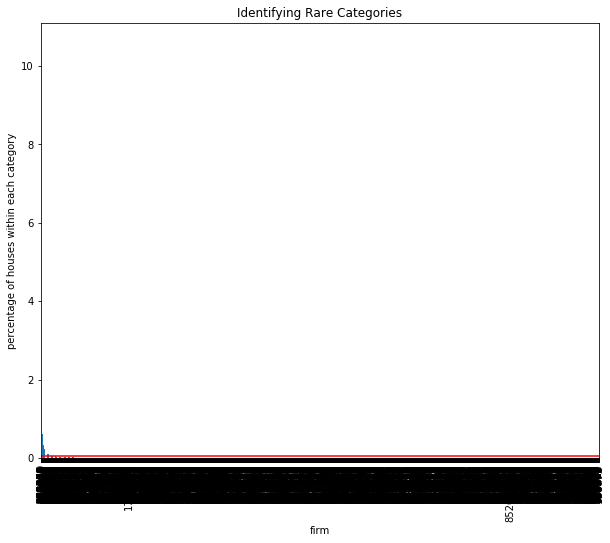

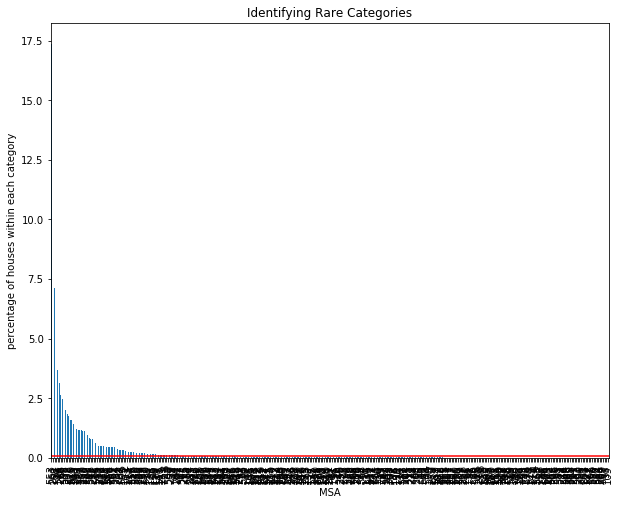

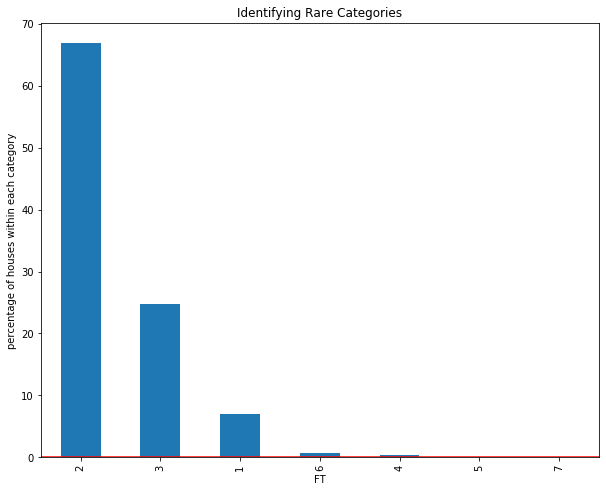

In [23]:
# outliers in categorical variables

for var in categorical:
    freq_var = 100*(data[var].value_counts() / len(data))
    # let's make plot with the category frequencies
    plt.figure(figsize=(10, 8))
    fig = freq_var.sort_values(ascending=False).plot.bar()

    # add a line to signal 5 % frequency limit
    # under which we will consider a category as rare
    fig.axhline(y=0.05, color='red')
    
    # add axis labels and title
    fig.set_ylabel('percentage of houses within each category')
    fig.set_xlabel(var)
    fig.set_title('Identifying Rare Categories')
    plt.show()

In [24]:
freq_firmtype = 100*(data['FT'].value_counts() / len(data))
print(freq_firmtype.map('{:,.3f} %'.format))

2    66.842 %
3    24.814 %
1     6.952 %
6     0.713 %
4     0.446 %
5     0.119 %
7     0.114 %
Name: FT, dtype: object


<b> ft:  Firm_Type: Based On NBER Data types - 7 types of Assigneee: <br>
1 - unassigned;<br> 2 - US non government organization; <br>3- non US non government organization; <br> 4- US individuals; <br> 5-non US individuals; <br> 6- US government;<br> 7- non US government<br> <b>

<b> <font color='purple'> Since this "FT" categorical variable has only 0.1% of values for the catefories 5 and 7, they can be grouped together as "Rare Category".Simiarly we can look at % of cardinality values in all categorical variables to decide which factors can be grouped as "Rare Category"

In [25]:
freq_UMC = 100*(data['UMC'].value_counts() / len(data))
print(freq_UMC.map('{:,.3f} %'.format))

345    7.297 %
382    5.589 %
707    5.212 %
711    5.107 %
714    4.953 %
        ...   
134    0.002 %
525    0.002 %
602    0.002 %
54     0.002 %
401    0.002 %
Name: UMC, Length: 260, dtype: object


In [26]:
freq_firm = 100*(data['firm'].value_counts() / len(data))
print(freq_firm.map('{:,.3f} %'.format))

280070    10.567 %
0          7.517 %
252865     2.797 %
706518     2.222 %
654319     2.210 %
            ...   
173210     0.002 %
748532     0.002 %
750752     0.002 %
740519     0.002 %
79865      0.002 %
Name: firm, Length: 8238, dtype: object


In [27]:
freq_MSA = 100*(data['MSA'].value_counts() / len(data))
print(freq_MSA.map('{:,.3f} %'.format))

553    17.389 %
261    14.455 %
168     7.138 %
32      4.588 %
16      3.702 %
         ...   
85      0.002 %
286     0.002 %
309     0.002 %
291     0.002 %
109     0.002 %
Name: MSA, Length: 354, dtype: object


## Continuous Variable Analysis

In [28]:
continuous

['fwd',
 'lag_d',
 'lag_y',
 'noc',
 'noi',
 'tbm',
 'tbru',
 'PAG',
 'npr',
 'fpr',
 'Cent',
 'EXP_Y',
 'DT',
 'IT',
 'RT',
 '3rd_PT',
 'Rnd_Int',
 'FS']

In [29]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

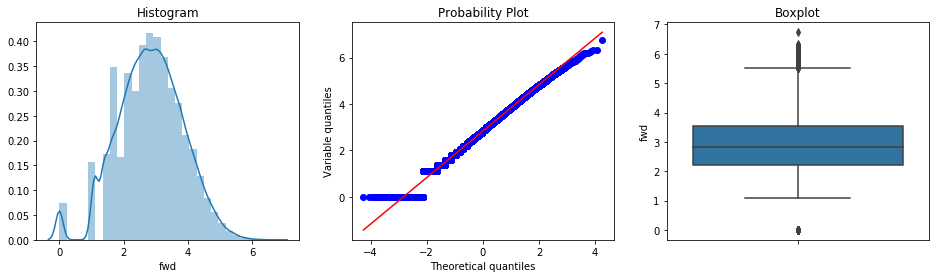

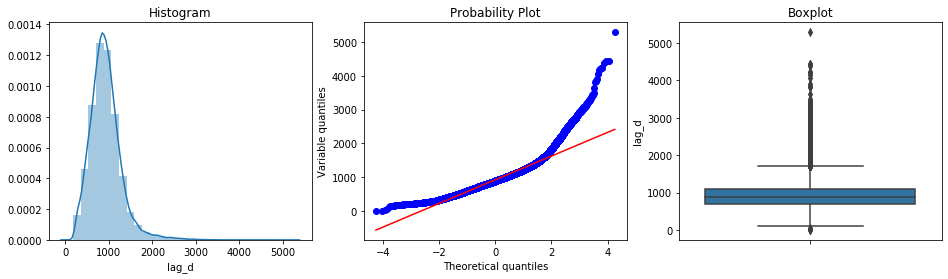

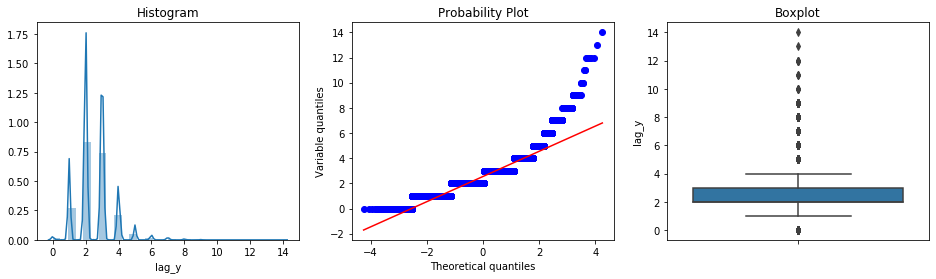

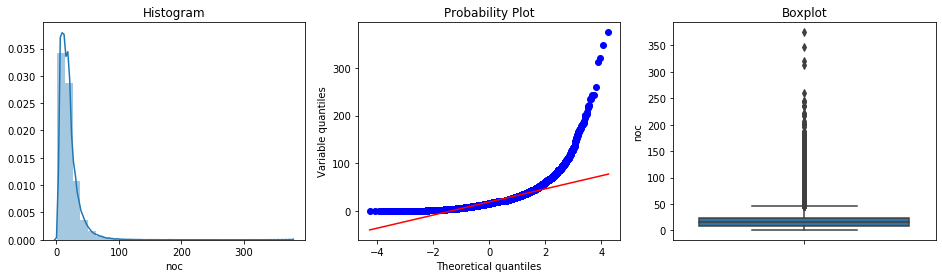

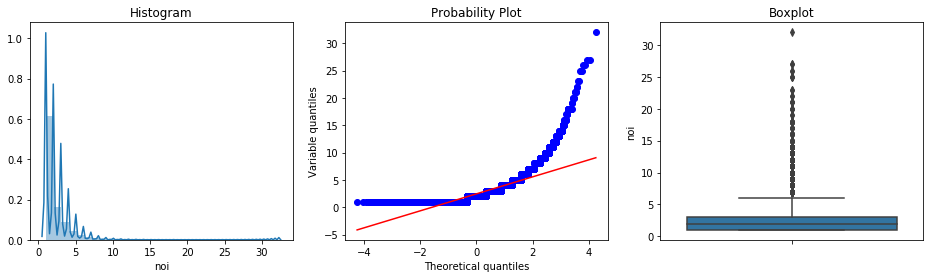

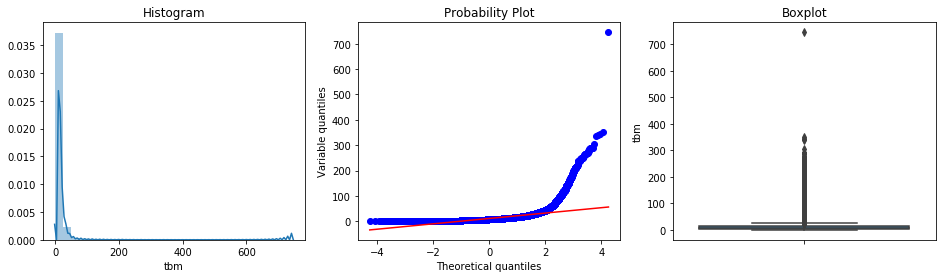

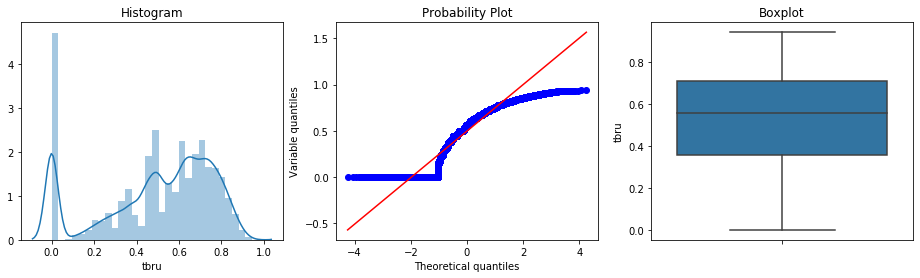

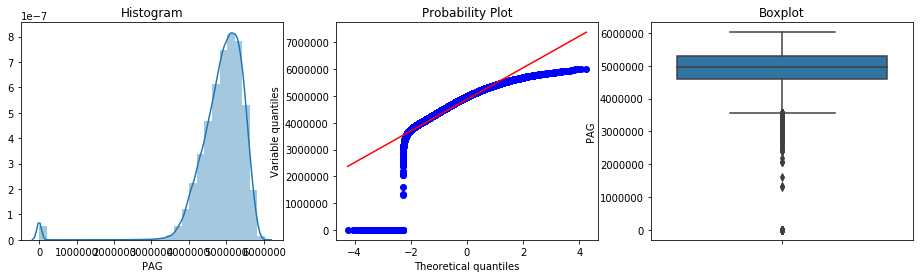

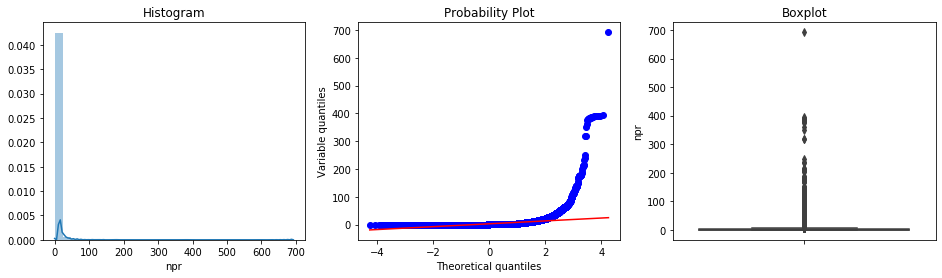

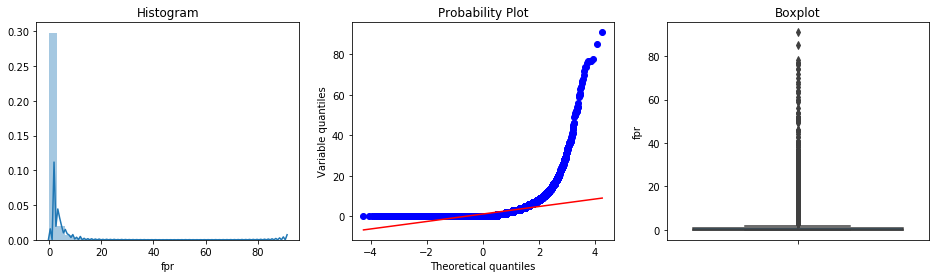

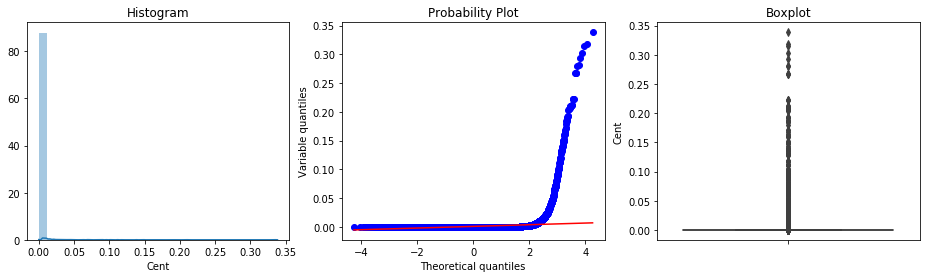

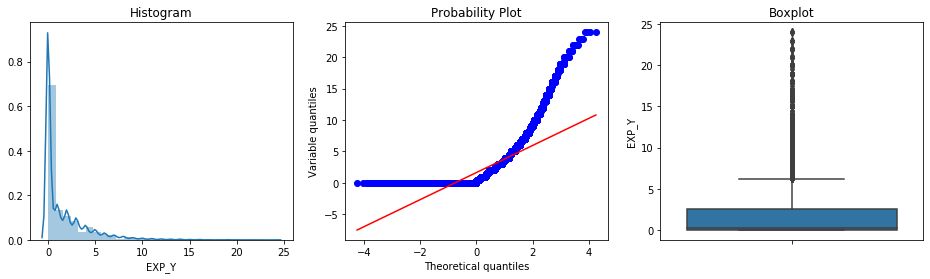

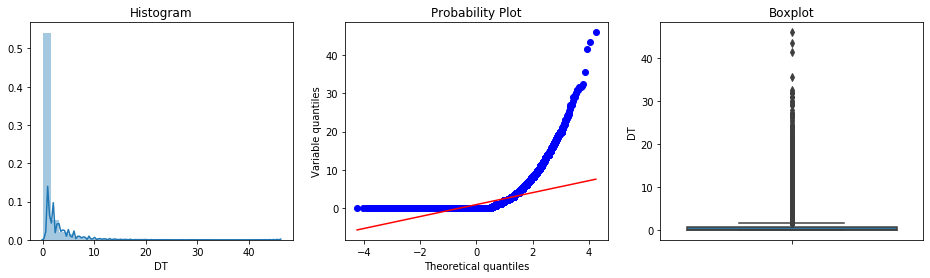

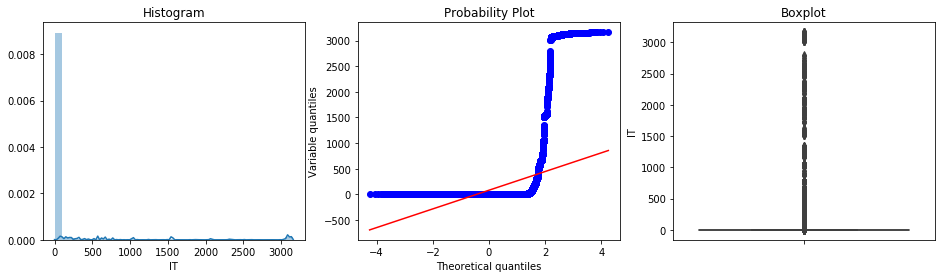

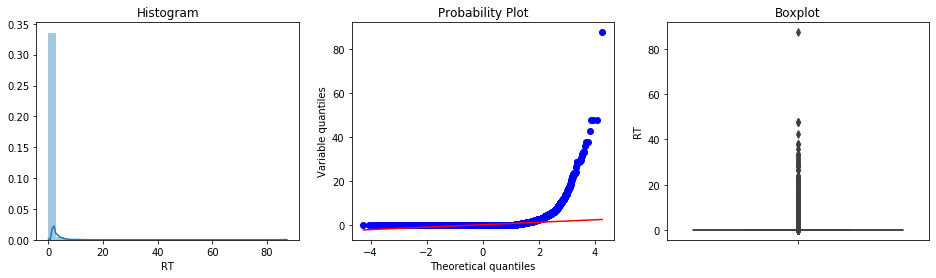

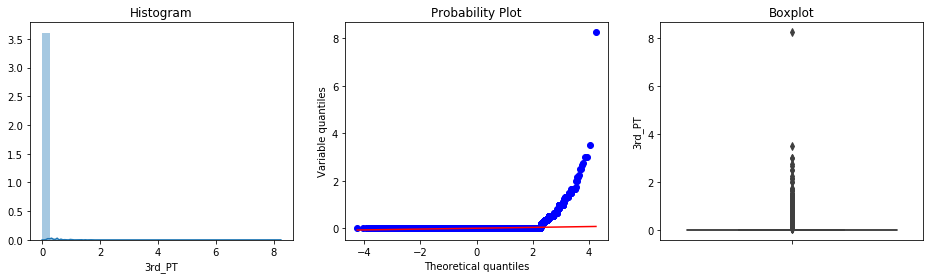

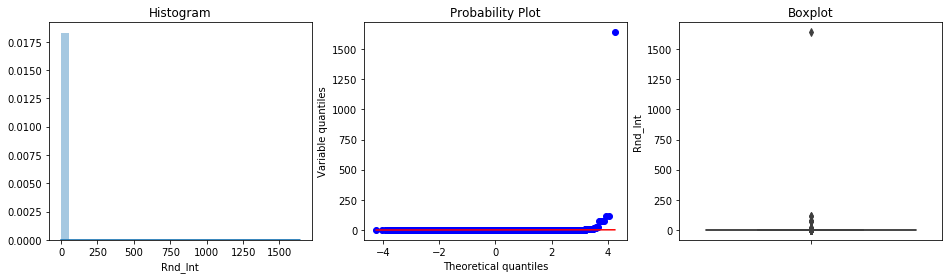

C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\

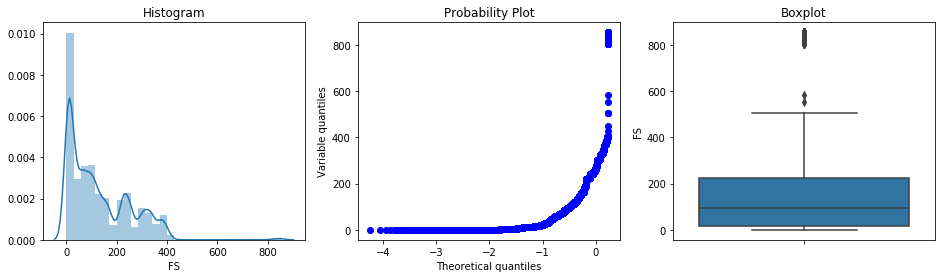

In [30]:
for variable in continuous:
    diagnostic_plots(data, variable)

<b> <font color='purple'> From histogram and box plot we see that, the distribution for almost all predictors are skewed and have outliers. Also variables like "RT", "Cent" etc., seem to have huge percentage of 0 values and hence the calculation for each of these variables are done and analysed

In [31]:
indexnpr = data[(data['npr'] == 0)]
len(indexnpr)/len(data)*100   

48.09185931181811

In [32]:
indexfpr = data[(data['fpr'] == 0)]
len(indexfpr)/len(data)*100   

69.2484931715877

In [33]:
indexCent = data[(data['Cent'] == 0)]
len(indexCent)/len(data)*100   

83.07316700999466

In [34]:
indexEXP_Y = data[(data['EXP_Y'] == 0)]
len(indexEXP_Y)/len(data)*100   

49.616235599298086

In [35]:
indexDT = data[(data['DT'] == 0)]
len(indexDT
   )/len(data)*100   

69.93514915693903

In [36]:
index3rd_PT = data[(data['3rd_PT'] == 0)]
len(index3rd_PT)/len(data)*100   

98.84794384679942

In [37]:
indexRnd_Int = data[(data['Rnd_Int'] == 0)]
len(indexRnd_Int)/len(data)*100  

41.90585183489738

In [38]:
indexRT = data[(data['RT'] == 0)]
len(indexRT)/len(data)*100   

85.11482413977264

In [39]:
indexRT = data[(data['IT'] == 0)]
len(indexRT)/len(data)*100   

79.77569237811856

<b> <font color='purple'> Variables that have 0 values greater than 90% are dropped as they would not contribute much towards prediction

In [40]:
# Droping columns that have 0 values greater than 90%
data = data.drop(['3rd_PT'], axis=1)


In [41]:
# Segregating predictors into groups for analysis

Cat_var = ['FT', 'firm', 'MSA', 'gy', 'ay', 'UMC']

continuous = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in ['FT', 'firm', 'MSA', 'gy', 'ay', 'UMC']
]

categorical = [var for var in data.columns if var not in continuous ]

print(f'There are {len(continuous)} continuous variables')

print(f'There are {len(categorical)} categorical variables')

There are 17 continuous variables
There are 6 categorical variables


In [42]:
continuous

['fwd',
 'lag_d',
 'lag_y',
 'noc',
 'noi',
 'tbm',
 'tbru',
 'PAG',
 'npr',
 'fpr',
 'Cent',
 'EXP_Y',
 'DT',
 'IT',
 'RT',
 'Rnd_Int',
 'FS']

In [43]:
def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)


    return upper_boundary, lower_boundary

In [44]:
outliers_dict={}
for var in continuous:
    upper_boundary, lower_boundary = find_boundaries(data, var,1.5)
    outliers = np.where(data[var] > upper_boundary, True,
                    np.where(data[var] < lower_boundary, True, False))
    outliers_dict[var]=data.loc[outliers, var]  
    

In [45]:
for key, value in outliers_dict.items():
    print(key, outliers_dict[key].count(),outliers_dict[key].min(),outliers_dict[key].max())

fwd 1247 0.0 6.7357800142423265
lag_d 1947 0 5285
lag_y 2886 0 14
noc 3228 47 375
noi 2205 7 32
tbm 4524 26 745
tbru 0 nan nan
PAG 1039 0.0 3570014.6
npr 8494 6 692
fpr 9048 3 91
Cent 11093 5e-09 0.33853034
EXP_Y 3933 6.28571 24.0
DT 11010 1.6666599999999998 46.0
IT 13254 0.006490000000000001 3161.84589
RT 9755 0.04545 87.44444
Rnd_Int 1353 0.18264 1639.0
FS 134 553.0 854.0


In [46]:
# Checking for skewness
from scipy.stats import skew 
skewness = data.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

firm       253.657066
Rnd_Int    248.395456
Cent        26.191860
npr         20.272350
RT          17.300570
tbm          9.029039
fpr          8.927039
IT           6.212259
DT           4.664335
noc          3.472530
EXP_Y        2.570647
noi          2.567646
FT           1.855520
lag_d        1.410198
lag_y        1.108892
MSA          0.386469
fwd         -0.095557
UMC         -0.641297
tbru        -0.703304
gy          -1.154728
ay          -1.257542
PAG         -3.793167
FS                NaN
dtype: float64

<b> <font color='purple'> Variables like firm , Rnd_Int have very high skewness. To reduce skewness and inorder to have normal distribution these variables can be log transformed

In [47]:
total_null_values= data.isnull().sum()
for key,value in total_null_values.items():
    if value >0:
        print(key,":",value)

FS : 26727


<b> <font color='purple'> The variable FS has Nan values and it can be imputed with median value as it has skewed distribution

# Train test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('fwd', axis=1), data['fwd'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((45874, 22), (19661, 22))

# Data Preprocessing

In [49]:
X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')

In [50]:
from sklearn.preprocessing import FunctionTransformer
from feature_engine.variable_transformers import LogTransformer
from feature_engine import variable_transformers as vt
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce
from feature_engine import outlier_removers as outr

house_pipe = Pipeline([

    # missing data imputation 
    # Since 'FS' is skewed in mature we use median imputation
    ('missing_ind', mdi.AddNaNBinaryImputer(
        variables= ['firm','tbm','tbru','npr','fpr','FS', 'Cent', 'RT', 'IT','DT','Rnd_Int'])),
    #('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                        #variables='FS')),
    ('imputer_num', mdi.ArbitraryNumberImputer(arbitrary_number=-99,
                                          variables='FS')),
    
    
    # removing outliers
    ('capper', outr.Winsorizer(
        distribution='skewed', tail='both', fold=3, variables=['Cent', 'IT', 'RT', 'fpr', 'npr'])),

    
    # Discrete encoding 
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(
        tol=0.05, n_categories= 6, variables= ['FT','MSA','UMC','gy','ay'])),
     ('rare_label_enc1', ce.RareLabelCategoricalEncoder(
        tol=0.0005, n_categories= 8, variables= 'firm')),
    ('categorical_enc', ce.OneHotCategoricalEncoder(
        top_categories=180, variables= ['FT','MSA','firm','UMC','gy','ay'])),

   
    # discretisation 
   ('discretisation', dsc.EqualFrequencyDiscretiser(
        q= 8, return_object=True, 
        variables=['PAG','tbm','FS','tbru'])),
    
    
    
    # log transformation
    #('log_transformer',FunctionTransformer(np.log1p, validate=True)),
    #('log_transformer',vt.LogTransformer(variables = ['noc', 'noi'])),
    ('log_transformer',vt.PowerTransformer(variables =['npr','noc', 'noi','fpr','Cent', 'EXP_Y','DT','IT','RT','Rnd_Int'], exp=0.5)),
     
    # feature Scaling
    ('scaler',MinMaxScaler()),
    
])

# Training of Models

In [51]:
house_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('missing_ind',
                 AddNaNBinaryImputer(variables=['firm', 'tbm', 'tbru', 'npr',
                                                'fpr', 'FS', 'Cent', 'RT', 'IT',
                                                'DT', 'Rnd_Int'])),
                ('imputer_num',
                 ArbitraryNumberImputer(arbitrary_number=-99,
                                        variables=['FS'])),
                ('capper',
                 Winsorizer(distribution='skewed', fold=3, tail='both',
                            variables=['Cent', 'IT', 'RT', 'fpr', 'npr'])),
                ('rare_label_enc',
                 Rar...
                 OneHotCategoricalEncoder(drop_last=False, top_categories=180,
                                          variables=['FT', 'MSA', 'firm', 'UMC',
                                                     'gy', 'ay'])),
                ('discretisation',
                 EqualFrequencyDiscretiser(q=8, return_object=True,


In [52]:
# Apply Transformations
X_train=house_pipe.transform(X_train)
X_test=house_pipe.transform(X_test)

## Linear Regression

In [51]:
# Train a linear regression model, report the coefficients and model performance 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train, cv = 6)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores))
print()
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
#print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# Check test data set performance
print("LR Performance Train: ", lr.score(X_train,y_train))
print("LR Performance Test: ", lr.score(X_test,y_test))

Mean Cross-validation scores: [0.19344112 0.21347098 0.20542319 0.17889141 0.20777596 0.20215828]

Mean Cross-validation scores: 0.20019348992941174

lr.intercept_: -2390618766982.348
LR Performance Train:  0.20809395251975607
LR Performance Test:  0.2030993915738336


## Linear regression with SGD 

In [52]:
## stochastic gradient descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
# create pipeline
reg_sgd_pipe = Pipeline([

    # feature Scaling
    ('scaler', MinMaxScaler()),
    # regression
    ('sgd_reg', SGDRegressor(max_iter=10000, tol = 1e-6))
])
param_sgd = {'sgd_reg__eta0':[0.02, 0.03, 0.01, 0.04, 0.1 ,0.10], 'sgd_reg__penalty' :['l1','l2'],'sgd_reg__alpha' :[0.02, 0.05,0.08, 0.1,0.01] }
grid_sgd = GridSearchCV(reg_sgd_pipe, param_sgd,cv=8, n_jobs=-1, return_train_score = True)

In [53]:
# let's fit the pipeline
grid_sgd.fit(X_train, y_train)

# let's get the predictions
X_train_preds = grid_sgd.predict(X_train)
X_test_preds = grid_sgd.predict(X_test)
# check model performance:
print("Best Mean Cross-validation score: {:.2f}".format(grid_sgd.best_score_))
print()
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print(grid_sgd.best_params_)

Best Mean Cross-validation score: 0.18

train r2: 0.18030637149725093

test r2: 0.18378139659919446
{'sgd_reg__alpha': 0.01, 'sgd_reg__eta0': 0.01, 'sgd_reg__penalty': 'l2'}


## Polynomial Regression

In [130]:
# Train a polynomial regression model, report the coefficients, the best parameters, and model performance 
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures()
lreg = LinearRegression()
#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,2)}


pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=6, return_train_score = True)


grid_poly.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_poly.best_score_))
print()

#find best parameters
print('Poly parameters: ', grid_poly.best_params_)

# Check test data set performance
print("Poly Performance Train : ", grid_poly.score(X_train,y_train))
print("Poly Performance Test : ", grid_poly.score(X_test,y_test))

# Print Co-efficients
finalLR = grid_poly.best_estimator_.named_steps['linearregression']

#print("poly.coef_:", finalLR.coef_)
print("poly.intercept_:", finalLR.intercept_)


Best Mean Cross-validation score: 0.20

Poly parameters:  {'polynomialfeatures__degree': 1}
Poly Performance Train :  0.20811675865127474
Poly Performance Test :  0.20309562999151598
poly.intercept_: -1205942962844.0688


## Polynomial Regression with regularization:

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures(degree=1))
    ,('norm_reg',LinearRegression())
])
    
param_poly = [{'norm_reg':[LinearRegression()]},
              {'norm_reg':[Lasso()],'norm_reg__alpha':[0.01,0.1,1]},
              {'norm_reg':[Ridge()],'norm_reg__alpha':[0.01,0.1,1]}
             ]
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, return_train_score = True,scoring='r2')
grid_poly .fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_poly.best_score_))
print()

#find best parameters
print('Polynomial Regression parameters: ', grid_poly.best_params_)

# Check test data set performance
print("Polynomial Regression Performance train: ", grid_poly.score(X_train,y_train))
print("Polynomial Regression Performance test: ", grid_poly.score(X_test,y_test))

Best Mean Cross-validation score: 0.20

Polynomial Regression parameters:  {'norm_reg': Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001), 'norm_reg__alpha': 1}
Polynomial Regression Performance train:  0.20810569093758813
Polynomial Regression Performance test:  0.20322606001267662


<b> PS: Since in the previous model the best polynomial feature selected is 1 and also since with degree 2 the model takes longer time the degree used here is 1

## Ridge

In [118]:
# Train a Ridge regression model, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[0.1, 1, 10, 50, 100, 500, 1000]}

grid_ridge = GridSearchCV(ridge, param_ridge, cv=6, return_train_score = True)
grid_ridge.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_ridge.best_score_))

print()

#find best parameters
print('Ridge parameters: ', grid_ridge.best_params_)

# print co-eff
#print("Ridge.coef_:", grid_ridge.best_estimator_.coef_)
print("Ridge.intercept_:", grid_ridge.best_estimator_.intercept_)

# Check test data set performance

print("Ridge Train Performance: ", grid_ridge.score(X_train,y_train))
print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))


Best Mean Cross-validation score: 0.20

Ridge parameters:  {'alpha': 10}
Ridge.intercept_: 1.9309551159979166
Ridge Train Performance:  0.20750044583947236
Ridge Test Performance:  0.2037355108231106


## Lasso

In [119]:
# Train a Lasso regression model, report the coefficients, the best parameters, and model performance 

from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)

#define a list of parameters
param_lasso = {'alpha':[0.001, 0.0001, 0.1, 1, 10, 100]}

grid_lasso = GridSearchCV(lasso, param_lasso, cv=6, return_train_score = True)
grid_lasso.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print()

#find best parameters
print('Lasso parameters: ', grid_lasso.best_params_)

# print co-eff
#print("Lasso.coef_:", grid_lasso.best_estimator_.coef_)
print("Lasso.intercept_:", grid_lasso.best_estimator_.intercept_)

# Check test data set performance
print("Lasso Train Performance: ", grid_lasso.score(X_train,y_train))
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

Best Mean Cross-validation score: 0.20

Lasso parameters:  {'alpha': 0.0001}
Lasso.intercept_: 1.9072493793287006
Lasso Train Performance:  0.20683719209985754
Lasso Test Performance:  0.20325442776981506


## Elastic Net

In [57]:
# Elastic net
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elasticnet = ElasticNet()

#define a list of parameters
param_elasticnet = {'alpha':[0.001, 0.01, 0.5, 8, 10], 'l1_ratio' :[.1, 0.15, .5, .7, .9, .95, .99, 1.0]}

grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=6, return_train_score = True)
grid_elasticnet.fit(X_train, y_train)

grid_elasticnet_train_score = grid_elasticnet.score(X_train, y_train)
grid_elasticnet_test_score = grid_elasticnet.score(X_test, y_test)

print('Training set score: ', grid_elasticnet_train_score)
print('Test score: ', grid_elasticnet_test_score)

#find best parameters
print('Best parameters: ', grid_elasticnet.best_params_)
print('Best cross-validation score:', grid_elasticnet.best_score_)

Training set score:  0.20199860747738982
Test score:  0.201287260487787
Best parameters:  {'alpha': 0.001, 'l1_ratio': 0.1}
Best cross-validation score: 0.19740572313053448


## KNN

In [54]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

# define a list of parameters
param_knn = {'n_neighbors': [5, 15]}
             #'weights': ['uniform', 'distance'],  'metric' : ['euclidean', 'manhattan']


#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=6, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Performance Train: ", grid_knn.score(X_train,y_train))
print("KNN Performance Test: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.13

KNN parameters:  {'n_neighbors': 15}
KNN Performance Train:  0.2439578708820164
KNN Performance Test:  0.14154819851675204


<b> PS: Though this model overfitted, the no. of neighbors was not increased as it took very long time to run this model

## Decision Tree

In [58]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(2,30)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=6, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance train: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Performance test: ", grid_dtree.score(X_test,y_test))


Best Mean Cross-validation score: 0.12

Decision Tree parameters:  {'max_depth': 7}
Decision Tree Performance train:  0.15121879651946024
Decision Tree Performance test:  0.1270482692988648


## SVM Regression - Linear

In [57]:
from sklearn.svm import LinearSVR

svr_linear = LinearSVR()

#define a list of parameters
param_svr_linear = {'C': [0.01,1,10,100,1000]}

#apply grid search
grid_param_svr_linear = GridSearchCV(svr_linear, param_svr_linear, cv=6, return_train_score = True)
grid_param_svr_linear.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svr_linear.best_score_))
print()

#find best parameters
print('SVR linear parameters: ', grid_param_svr_linear.best_params_)



# Check test data set performance
print("SVR linear Performance train: ", grid_param_svr_linear.score(X_train,y_train))
print("SVR linear Performance test: ", grid_param_svr_linear.score(X_test,y_test))

C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear f

Best Mean Cross-validation score: 0.20

SVR linear parameters:  {'C': 1}
SVR linear Performance train:  0.2057097598227513
SVR linear Performance test:  0.20053329664061892


## SVM Regression with Kernels( Poly, rbf , sigmoid)

<b> PS:This model caould not be run it took more than 8 hours

from sklearn.svm import SVR

svr = SVR()

#define a list of parameters
param_svr = {'kernel': ('poly', 'rbf', 'sigmoid'), 'epsilon': [0.001, 0.1, 0.9, 1.5], 
             'C': [0.001, 0.1, 1, 10], 
             'degree': [2, 3], 'gamma': [0.0001, 0.001, 0.01]}

#apply grid search
grid_param_svr = GridSearchCV(svr, param_svr, cv=6, return_train_score = True)
grid_param_svr.fit(X_train, y_train)

####  Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svr.best_score_))
print()

#find best parameters
print('SVR parameters: ', grid_param_svr.best_params_)



#### Check test data set performance
print("SVR Performance train: ", grid_param_svr.score(X_train,y_train))
print("SVR Performance test: ", grid_param_svr.score(X_test,y_test))